In [2]:
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from astropy.stats import sigma_clipped_stats
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import gaussian_kde
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

# **Messier 7**

In [3]:
querym7 = '''
SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 267.86 and 269.063
AND dec between -35.39 and -34.19
AND abs(pmra_error/pmra)<0.10
AND abs(pmdec_error/pmdec)<0.10
and parallax_over_error > 10
order by parallax desc'''
jobm7 = Gaia.launch_job_async(querym7)
rm7 = jobm7.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


Text(0, 0.5, 'Apparent Magnitude in G passband')

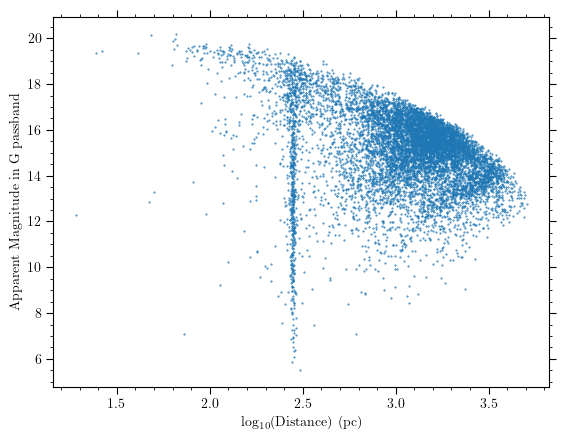

In [4]:
distm7 = 1000/rm7['parallax']
plt.scatter(np.log10(distm7),rm7['phot_g_mean_mag'], s=0.2)
plt.xlabel('log$_{10}$(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')

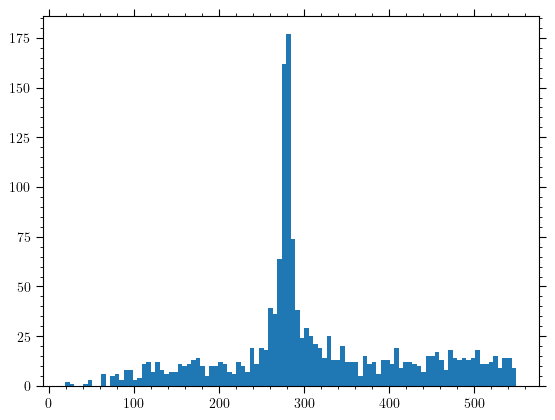

In [5]:
# CODE FOR DISTANCE CUTS
distm7 = distm7[distm7<550]
# CODE FOR HISTOGRAM
plt.hist((distm7), bins=100)
plt.show()

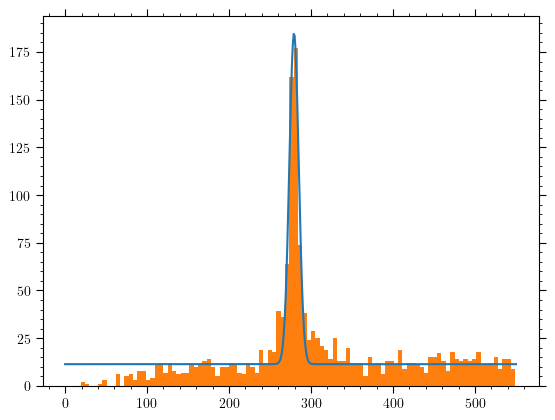

In [11]:
def f(x, A, m, s, c):
    return A*np.exp(-(x-m)**2/(2*s**2)) + c

#TO GET VALUES OF X AND Y FROM HISTOGRAM - LOOK UP NUMPY.HISTOGRAM SYNTAX
nm7, binsm7 = np.histogram(distm7, bins=100)
binsm7 = [0.5*(binsm7[i]+binsm7[i+1]) for i in range(len(binsm7)-1)]
#CODE FOR GAUSSIAN FITTING
p0 = [10, 250, 100, 100]
poptm7, pcovm7 = curve_fit(f, binsm7, nm7, p0)
xm7 = np.linspace(0,550,500)
plt.plot(xm7, f(xm7, *poptm7))
plt.hist(distm7, bins=100)
plt.show()

In [7]:
#cuts to be applied to parallax
print(1000/np.min([distm7[distm7>(poptm7[1]-poptm7[2])]]), 1000/np.max([distm7[distm7<(poptm7[1]+poptm7[2])]]))

3.507612770398551 3.6563135436913794


In [43]:
querym7_2 = '''
SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 267.86 and 269.063
AND dec between -35.39 and -34.19
AND abs(pmra_error/pmra)<0.10 
AND abs(pmdec_error/pmdec)<0.10
and parallax between 3.5 and 3.6568
and pmra between 1.06 and 5.16
and pmdec between -7.55 and -3.15'''
jobm7_2 = Gaia.launch_job_async(querym7_2)
rm7_2 = jobm7_2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


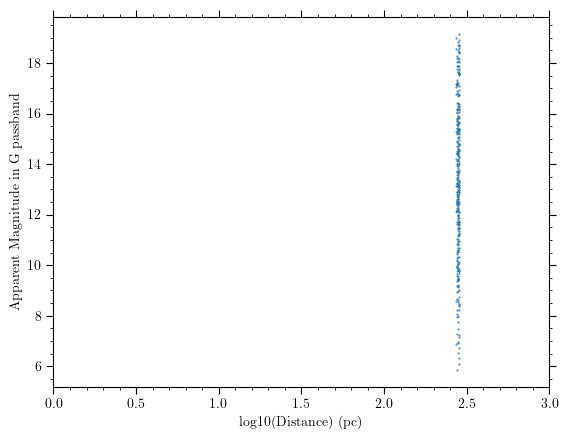

In [44]:
plt.scatter(np.log10(1000/rm7_2['parallax']),rm7_2['phot_g_mean_mag'], s=0.2)
plt.xlim(0,3)
plt.xlabel('log10(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')
plt.show()

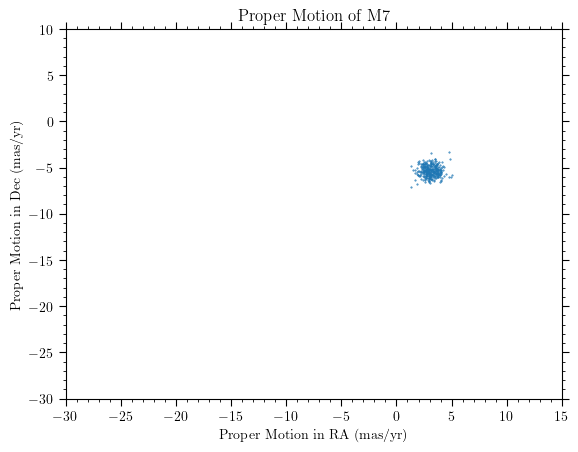

In [45]:
plt.scatter(rm7_2['pmra'],rm7_2['pmdec'], s=0.2)
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.title('Proper Motion of M7')
plt.xlim(-30,15)
plt.ylim(-30,10)
plt.show()

In [42]:
#applying sigma clipping
mean_pmra_m7, median_pmra_m7, std_pmra_m7 = sigma_clipped_stats(rm7_2['pmra'])
mean_pmdec_m7, median_pmdec_m7, std_pmdec_m7 = sigma_clipped_stats(rm7_2['pmdec'])
print((mean_pmra_m7-3*std_pmra_m7, mean_pmra_m7+3*std_pmra_m7))
print((mean_pmdec_m7-3*std_pmdec_m7, mean_pmdec_m7+3*std_pmdec_m7))

(1.0639067222228284, 5.160875428741267)
(-7.555962296177423, -3.154029365908208)


# **Messier 6**

In [12]:
querym6 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 264.425 and 265.625
AND dec between -32.81 and -31.61
AND abs(pmra_error/pmra)<0.10
AND abs(pmdec_error/pmdec)<0.10
and parallax_over_error > 10
order by parallax desc'''
jobm6 = Gaia.launch_job_async(querym6)
rm6 = jobm6.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


Text(0, 0.5, 'Apparent Magnitude in G passband')

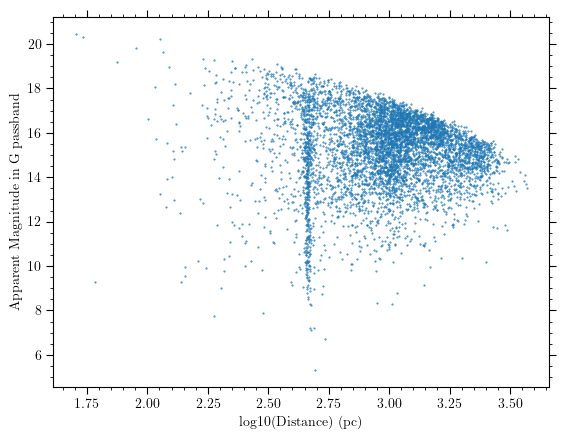

In [13]:
distm6 = 1000/rm6['parallax']
plt.scatter(np.log10(distm6),rm6['phot_g_mean_mag'], s=0.2)
plt.xlabel('log10(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')

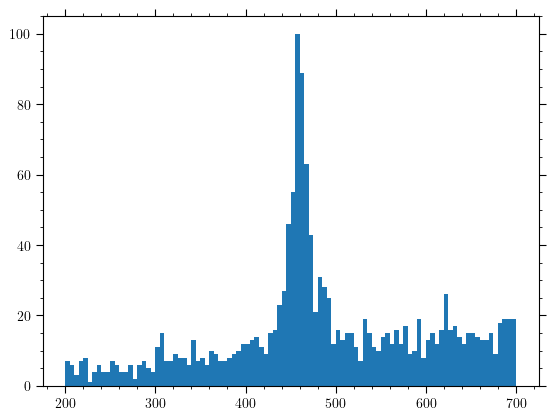

In [14]:
# CODE FOR DISTANCE CUTS
distm6 = distm6[distm6<700]
distm6 = distm6[distm6>200]
# CODE FOR HISTOGRAM
plt.hist((distm6), bins=100)
plt.show()

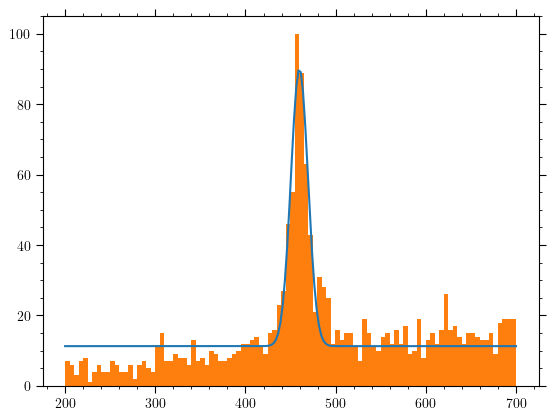

In [15]:
def f(x, A, m, s, c):
    return A*np.exp(-(x-m)**2/(2*s**2)) + c

#TO GET VALUES OF X AND Y FROM HISTOGRAM - LOOK UP NUMPY.HISTOGRAM SYNTAX
nm6, binsm6 = np.histogram(distm6, bins=100)
binsm6 = [0.5*(binsm6[i]+binsm6[i+1]) for i in range(len(binsm6)-1)]
#CODE FOR GAUSSIAN FITTING
p0m7 = [10, 450, 100, 100]
poptm6, pcovm6 = curve_fit(f, binsm6, nm6, p0m7)
xm6 = np.linspace(200,700,200)
plt.plot(xm6, f(xm6, *poptm6))
plt.hist(distm6, bins=100)
plt.show()

In [16]:
#cuts to be applied to parallax
print(1000/np.min([distm6[distm6>(poptm6[1]-poptm6[2])]]), 1000/np.max([distm6[distm6<(poptm6[1]+poptm6[2])]]))

2.129634835758908 2.2205744865567727


In [31]:
querym6_2 = '''
SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 264.425 and 265.625
AND dec between -32.81 and -31.61
AND abs(pmra_error/pmra)<0.10 
AND abs(pmdec_error/pmdec)<0.10
and parallax between 2.13 and 2.22
and pmra between -1.677 and -1.15
and pmdec between -6.145 and -5.59
'''
#and pmra between -1.83 and -1
#and pmdec between -6.3 and -5.4
jobm6_2 = Gaia.launch_job_async(querym6_2)
rm6_2 = jobm6_2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


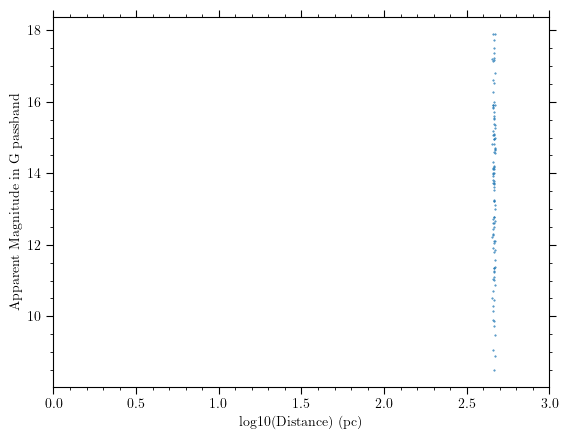

In [32]:
plt.scatter(np.log10(1000/rm6_2['parallax']),rm6_2['phot_g_mean_mag'], s=0.2)
plt.xlim(0,3)
plt.xlabel('log10(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')
plt.show()

In [30]:
#applying sigma clipping
mean_pmra_m6, median_pmra_m6, std_pmra_m6 = sigma_clipped_stats(rm6_2['pmra'])
mean_pmdec_m6, median_pmdec_m6, std_pmdec_m6 = sigma_clipped_stats(rm6_2['pmdec'])
print((mean_pmra_m6-1.5*(std_pmra_m6)**2, mean_pmra_m6+1.5*(std_pmra_m6)**2))
print((mean_pmdec_m6-1.5*(std_pmdec_m6)**2, mean_pmdec_m6+1.5*(std_pmdec_m6)**2))

(-1.6771026767365504, -1.155605716457195)
(-6.1452857665292155, -5.5931080495635)


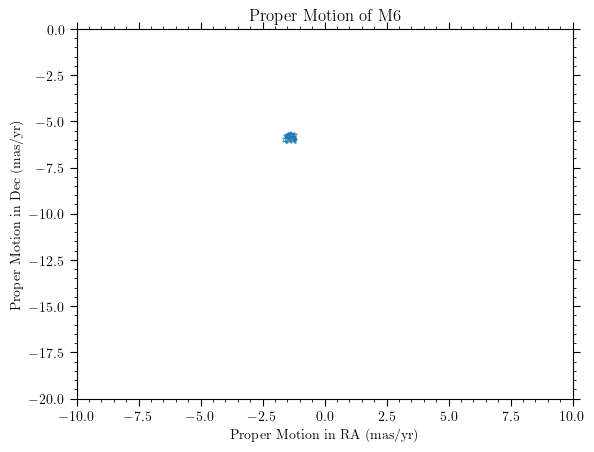

In [33]:
plt.scatter(rm6_2['pmra'],rm6_2['pmdec'], s=0.2)
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.title('Proper Motion of M6')
plt.xlim(-10, 10)
plt.ylim(-20,0)
plt.show()

# **Messier 50**

In [20]:
querym50 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 105.2 and 106.39
AND dec between -8.93 and -7.73
AND abs(pmra_error/pmra)<0.10 
AND abs(pmdec_error/pmdec)<0.10
and parallax_over_error > 10 
order by parallax desc'''
jobm50 = Gaia.launch_job_async(querym50)
rm50 = jobm50.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


Text(0.5, 0, 'log10(Distance) (pc)')

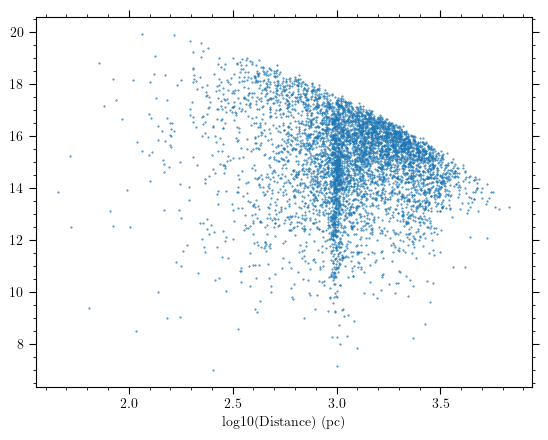

In [21]:
distm50 = 1000/rm50['parallax']
plt.scatter(np.log10(distm50),rm50['phot_g_mean_mag'], s=0.2)
plt.xlabel('log10(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')

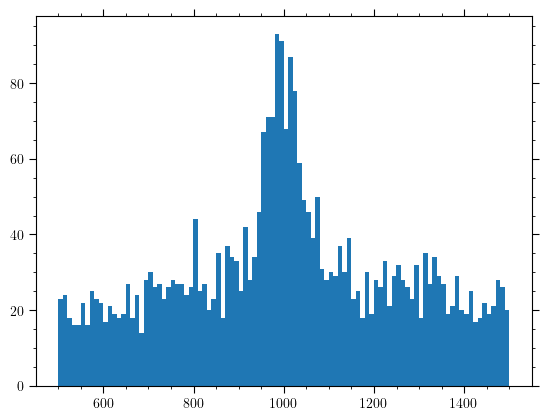

In [22]:
# CODE FOR DISTANCE CUTS
distm50 = distm50[distm50<1500]
distm50 = distm50[distm50>500]
# CODE FOR HISTOGRAM
plt.hist((distm50), bins=100)
plt.show()

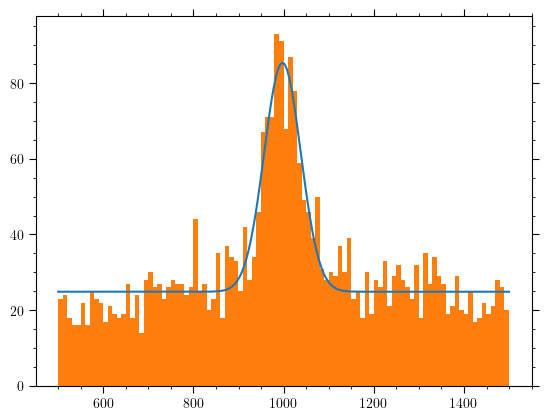

In [23]:
def f(x, A, m, s, c):
    return A*np.exp(-(x-m)**2/(2*s**2)) + c

#TO GET VALUES OF X AND Y FROM HISTOGRAM - LOOK UP NUMPY.HISTOGRAM SYNTAX
nm50, binsm50 = np.histogram(distm50, bins=100)

binsm50 = [0.5*(binsm50[i]+binsm50[i+1]) for i in range(len(binsm50)-1)]
#CODE FOR GAUSSIAN FITTING
p0m50 = [10, 1000, 100, 100]

poptm50, pcovm50 = curve_fit(f, binsm50, nm50, p0m50)
xm50 = np.linspace(500,1500,200)
plt.plot(xm50, f(xm50, *poptm50))

plt.hist(distm50, bins=100)
plt.show()

In [24]:
#cuts to be applied to parallax

print(1000/np.min([distm50[distm50>(poptm50[1]-poptm50[2])]]), 1000/np.max([distm50[distm50<(poptm50[1]+poptm50[2])]]))

0.9631824503988602 1.0451639801434636


In [52]:
querym50_2 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 105.2 and 106.39
AND dec between -8.93 and -7.73
AND abs(pmra_error/pmra)<0.10 
AND abs(pmdec_error/pmdec)<0.10
and parallax between 0.96 and 1.04
and parallax_over_error > 10 
and pmra between -1.58 and 0
and pmdec between -1.29 and 0'''

jobm50_2 = Gaia.launch_job_async(querym50_2)
rm50_2 = jobm50_2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


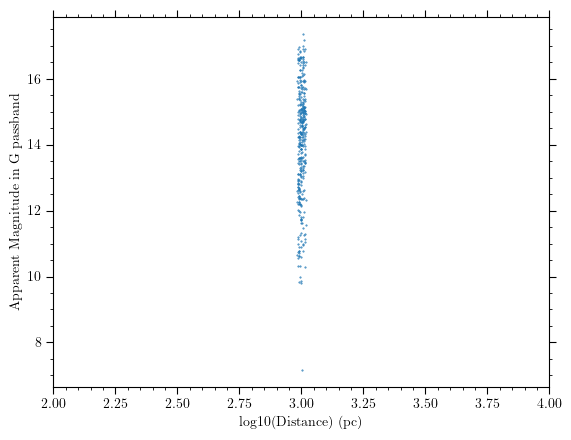

In [53]:
plt.scatter(np.log10(1000/rm50_2['parallax']),rm50_2['phot_g_mean_mag'], s=0.2)
plt.xlim(2,4)
plt.xlabel('log10(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')
plt.show()

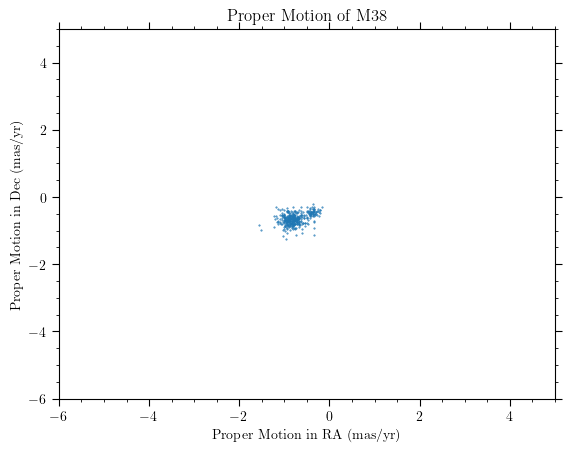

In [57]:
plt.scatter(rm50_2['pmra'],rm50_2['pmdec'], s=0.2)
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.title('Proper Motion of M50')  
plt.xlim(-6,5)
plt.ylim(-6,5)
plt.show()

In [51]:
#applying sigma clipping
mean_pmra_m50, median_pmra_m50, std_pmra_m50 = sigma_clipped_stats(rm50_2['pmra'])
mean_pmdec_m50, median_pmdec_m50, std_pmdec_m50 = sigma_clipped_stats(rm50_2['pmdec'])
print(str(format(mean_pmra_m50-3*std_pmra_m50, '.2f'))+ ' and '+ str(format(mean_pmra_m50+3*std_pmra_m50, '.2f')))
print(str(format(mean_pmdec_m50-3*std_pmdec_m50, '.2f'))+ ' and '+ str(format(mean_pmdec_m50+3*std_pmdec_m50, '.2f')))

-1.58 and 0.01
-1.29 and -0.04


# **Messier 45**

In [58]:
query_m45 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 56.2 and 57.39
AND dec between 23.07 and 24.27
AND abs(pmra_error/pmra)<0.10
AND abs(pmdec_error/pmdec)<0.10
and parallax_over_error > 10
order by parallax desc'''
job_m45 = Gaia.launch_job_async(query_m45)
r_m45 = job_m45.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


Text(0, 0.5, 'Apparent Magnitude in G passband')

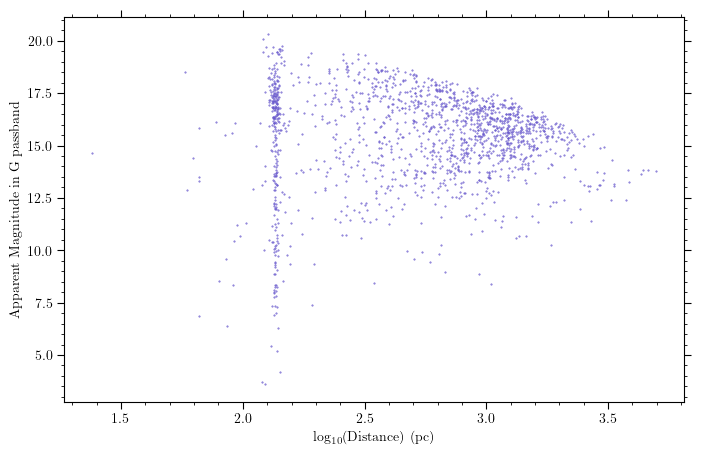

In [78]:
dist_m45 = 1000/r_m45['parallax']
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(np.log10(dist_m45),r_m45['phot_g_mean_mag'], s=0.2, c='slateblue')
plt.xlabel('log$_{10}$(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')

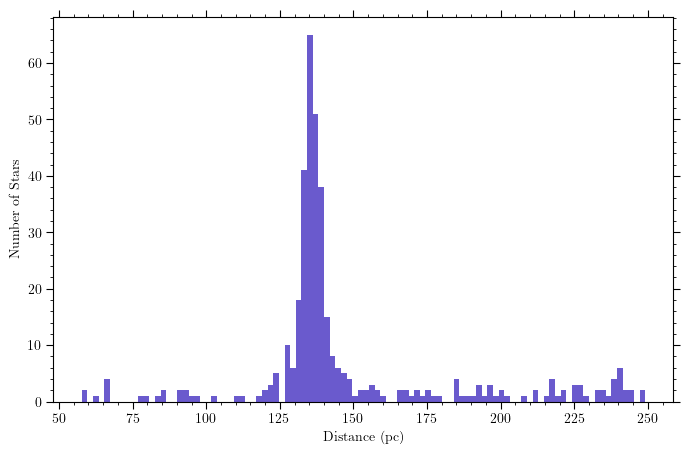

In [80]:
#CODE FOR DISTANCE CUTS
dist_m45 = dist_m45[dist_m45<250]
dist_m45 = dist_m45[dist_m45>50]
#CODE FOR HISTOGRAM
plt.figure(figsize=(8,5), dpi=100)
plt.hist((dist_m45), bins=100, color = 'slateblue')
plt.xlabel('Distance (pc)')
plt.ylabel('Number of Stars')
plt.show()

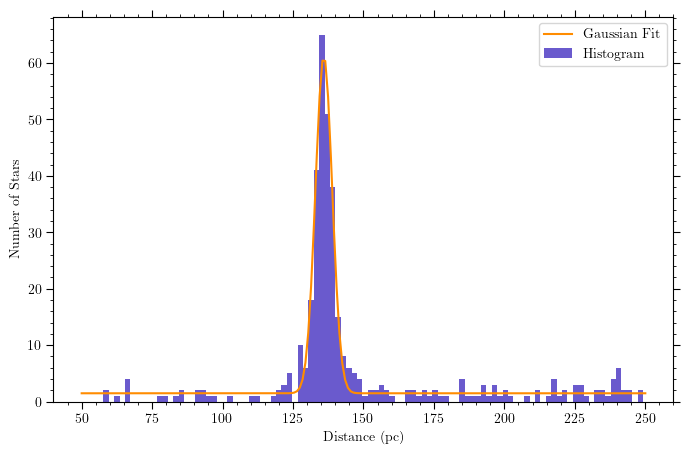

In [82]:
def f(x, A, m, s, c):
    return A*np.exp(-(x-m)**2/(2*s**2)) + c


n_m45, bins_m45 = np.histogram(dist_m45, bins=100)
bins_m45 = [0.5*(bins_m45[i]+bins_m45[i+1]) for i in range(len(bins_m45)-1)]
#CODE FOR GAUSSIAN FITTING
p0_m45 = [max(dist_m45), np.mean(dist_m45), np.std(dist_m45), 100]
popt_m45, pcov_m45 = curve_fit(f, bins_m45, n_m45, p0_m45)
x_m45 = np.linspace(50,250,200)

plt.figure(figsize=(8,5), dpi=100)
plt.plot(x_m45, f(x_m45, *popt_m45), color = 'darkorange')
plt.hist(dist_m45, bins=100, color = 'slateblue')
plt.xlabel('Distance (pc)')
plt.ylabel('Number of Stars')
plt.legend(['Gaussian Fit', 'Histogram'])
plt.show()

In [83]:
#cuts to be applied to parallax
print(1000/np.min([dist_m45[dist_m45>(popt_m45[1]-popt_m45[2])]]), 1000/np.max([dist_m45[dist_m45<(popt_m45[1]+popt_m45[2])]]))

7.1943979767951705 7.528337727096915


In [90]:
query_m45_2 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 56.2 and 57.39
AND dec between 23.07 and 24.27
AND abs(pmra_error/pmra)<0.10
AND abs(pmdec_error/pmdec)<0.10
and parallax between 7.19 and 7.53
and pmra between 16.90 and 22.62
and pmdec between -48.15 and -42.32'''
job_m45_2 = Gaia.launch_job_async(query_m45_2)
r_m45_2 = job_m45_2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


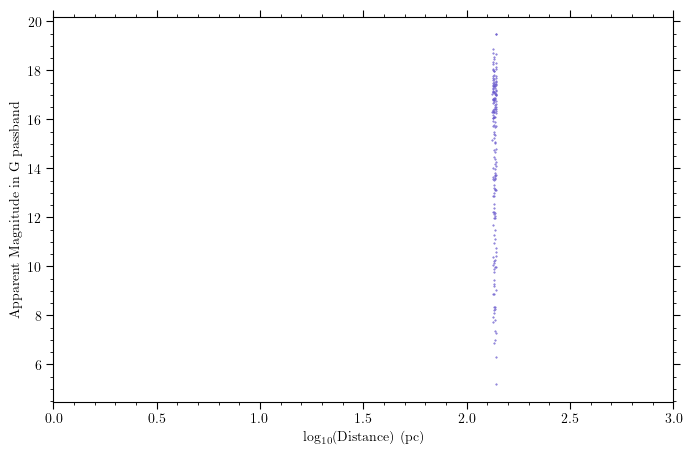

In [91]:
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(np.log10(1000/r_m45_2['parallax']),r_m45_2['phot_g_mean_mag'], s=0.2, c='slateblue')
plt.xlim(0,3)
plt.xlabel('log$_{10}$(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')
plt.show()

In [92]:
#applying sigma clipping
mean_pmra_m45, median_pmra_m45, std_pmra_m45 = sigma_clipped_stats(r_m45_2['pmra'])
mean_pmdec_m45, median_pmdec_m45, std_pmdec_m45 = sigma_clipped_stats(r_m45_2['pmdec'])
print(str(format(mean_pmra_m45-3*std_pmra_m45, '.2f'))+ ' and '+ str(format(mean_pmra_m45+3*std_pmra_m45, '.2f')))
print(str(format(mean_pmdec_m45-3*std_pmdec_m45, '.2f'))+ ' and '+ str(format(mean_pmdec_m45+3*std_pmdec_m45, '.2f')))

16.93 and 22.60
-48.12 and -42.32


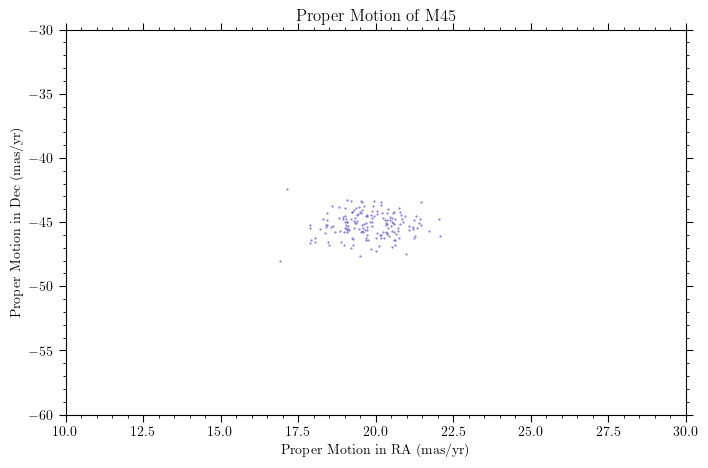

In [94]:
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(r_m45_2['pmra'],r_m45_2['pmdec'], s=0.2, c='slateblue')
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.title('Proper Motion of M45')
plt.xlim(10,30)
plt.ylim(-60,-30)
plt.show()

# **Lambda Orionis**

In [103]:
query_loc = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pmra, pmdec, radial_velocity
FROM gaiadr3.gaia_source
where ra between 83.18 and 84.38
and dec between 9.33 and 10.53
and abs(pmra_error/pmra)<0.10
and abs(pmdec_error/pmdec)<0.10
and parallax_over_error > 10
order by parallax desc'''
job_loc = Gaia.launch_job_async(query_loc)
r_loc = job_loc.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


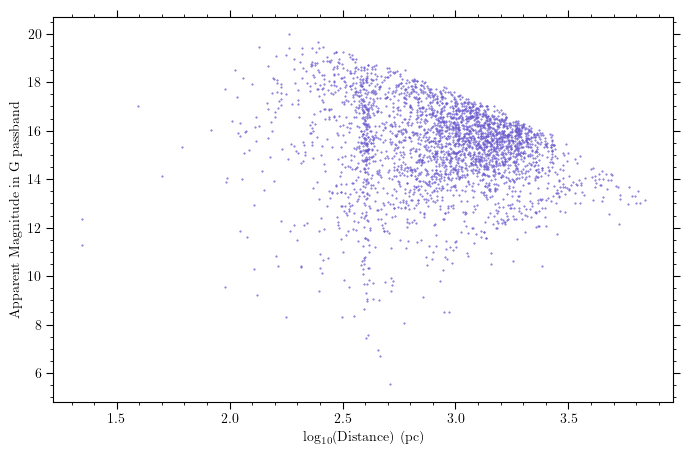

In [104]:
dist_loc = 1000/r_loc['parallax']
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(np.log10(dist_loc),r_loc['phot_g_mean_mag'], s=0.2, c='slateblue')
plt.xlabel('log$_{10}$(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')
plt.show()

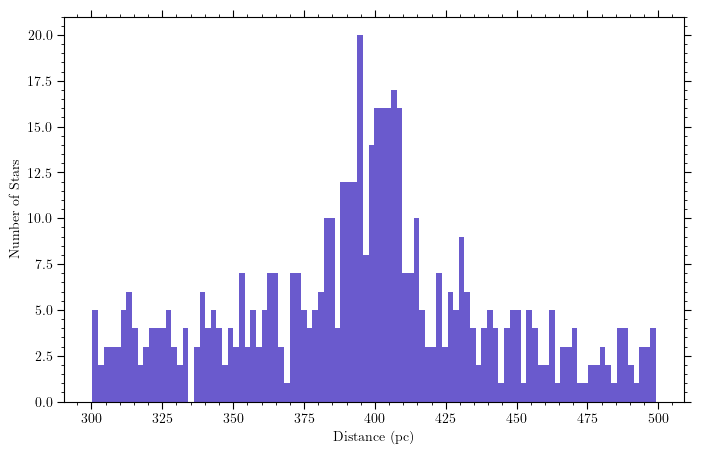

In [105]:
#CODE FOR DISTANCE CUTS
dist_loc = dist_loc[dist_loc<500]
dist_loc = dist_loc[dist_loc>300]
#CODE FOR HISTOGRAM
plt.figure(figsize=(8,5), dpi=100)
plt.hist((dist_loc), bins=100, color = 'slateblue')
plt.xlabel('Distance (pc)')
plt.ylabel('Number of Stars')
plt.show()

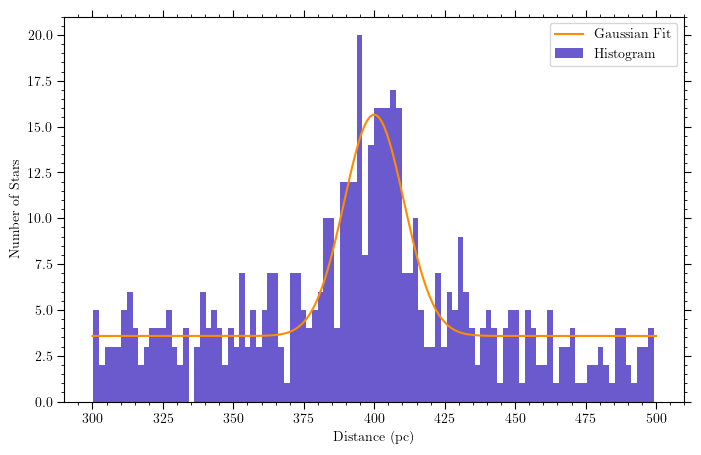

In [107]:
def f(x, A, m, s, c):
    return A*np.exp(-(x-m)**2/(2*s**2)) + c

n_loc, bins_loc = np.histogram(dist_loc, bins=100)  
bins_loc = [0.5*(bins_loc[i]+bins_loc[i+1]) for i in range(len(bins_loc)-1)]
#CODE FOR GAUSSIAN FITTING
p0_loc = [max(dist_loc), np.mean(dist_loc), np.std(dist_loc), 100]
popt_loc, pcov_loc = curve_fit(f, bins_loc, n_loc, p0_loc)

x_loc = np.linspace(300,500,200)
plt.figure(figsize=(8,5), dpi=100)
plt.plot(x_loc, f(x_loc, *popt_loc), color = 'darkorange')
plt.hist(dist_loc, bins=100, color = 'slateblue')
plt.xlabel('Distance (pc)')
plt.ylabel('Number of Stars')
plt.legend(['Gaussian Fit', 'Histogram'])
plt.show()

In [108]:
#cuts to be applied to parallax
print(1000/np.min([dist_loc[dist_loc>(popt_loc[1]-popt_loc[2])]]), 1000/np.max([dist_loc[dist_loc<(popt_loc[1]+popt_loc[2])]]))

2.4346158247564427 2.5685017457730703


In [119]:
query_loc_2 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pmra, pmdec, radial_velocity
FROM gaiadr3.gaia_source
where ra between 83.18 and 84.38
and dec between 9.33 and 10.53
and abs(pmra_error/pmra)<0.10
and abs(pmdec_error/pmdec)<0.10
and parallax between 2.43 and 2.56
and pmra between -0.13 and 2.57
and pmdec between -2.69 and -1.44
order by parallax desc'''
job_loc_2 = Gaia.launch_job_async(query_loc_2)
r_loc_2 = job_loc_2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


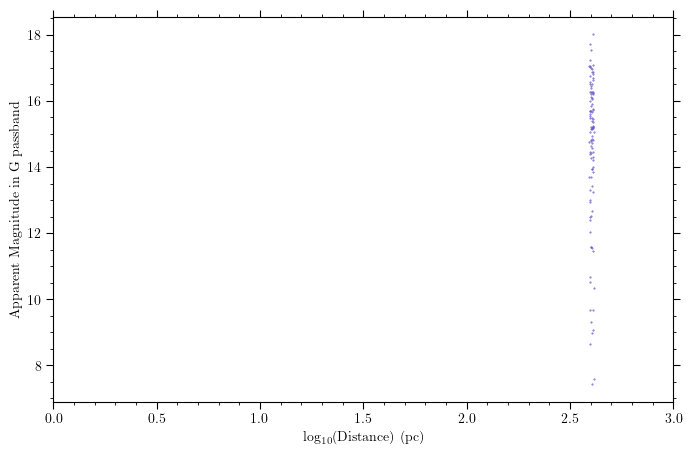

In [120]:
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(np.log10(1000/r_loc_2['parallax']),r_loc_2['phot_g_mean_mag'], s=0.2, c='slateblue')
plt.xlim(0,3)
plt.xlabel('log$_{10}$(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')
plt.show()

In [121]:
#applying sigma clipping
mean_pmra_loc, median_pmra_loc, std_pmra_loc = sigma_clipped_stats(r_loc_2['pmra'])
mean_pmdec_loc, median_pmdec_loc, std_pmdec_loc = sigma_clipped_stats(r_loc_2['pmdec'])
print(str(format(mean_pmra_loc-3*std_pmra_loc, '.2f'))+ ' and '+ str(format(mean_pmra_loc+3*std_pmra_loc, '.2f')))
print(str(format(mean_pmdec_loc-3*std_pmdec_loc, '.2f'))+ ' and '+ str(format(mean_pmdec_loc+3*std_pmdec_loc, '.2f')))

-0.12 and 2.55
-2.69 and -1.44


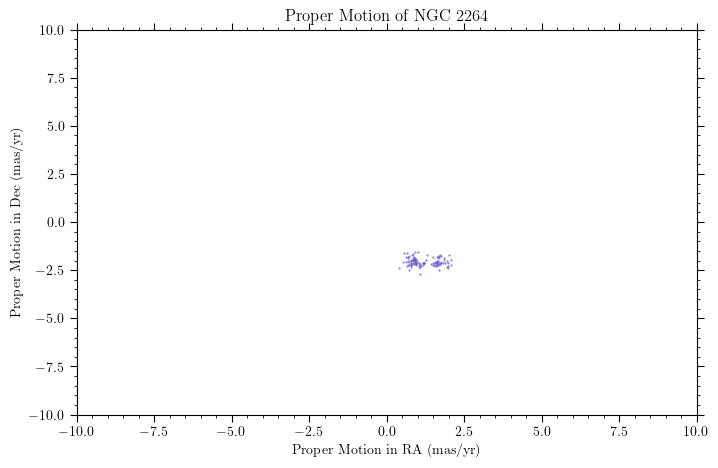

In [122]:
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(r_loc_2['pmra'],r_loc_2['pmdec'], s=0.2, c='slateblue')
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.title('Proper Motion of NGC 2264')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

# **Messier 38**

In [3]:
query_m38 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pmra, pmdec, radial_velocity
FROM gaiadr3.gaia_source
where ra between 81.58 and 82.78
and dec between 35.26 and 36.46
and abs(pmra_error/pmra)<0.10
and abs(pmdec_error/pmdec)<0.10
and parallax_over_error > 10
order by parallax desc'''
job_m38 = Gaia.launch_job_async(query_m38)
r_m38 = job_m38.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


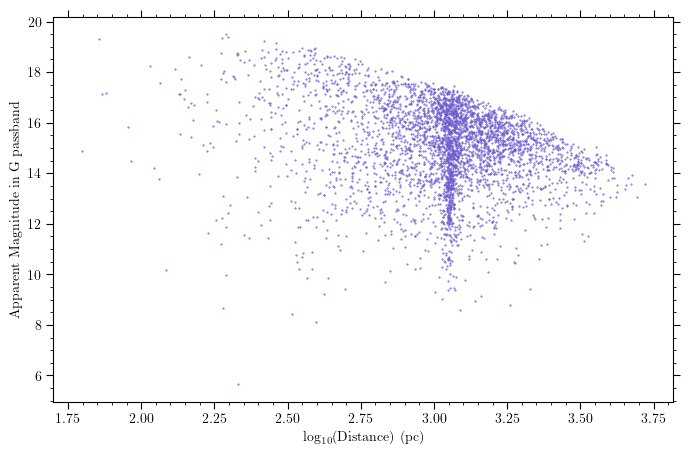

In [4]:
dist_m38 = 1000/r_m38['parallax']
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(np.log10(dist_m38),r_m38['phot_g_mean_mag'], s=0.2, c='slateblue')
plt.xlabel('log$_{10}$(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')
plt.show()

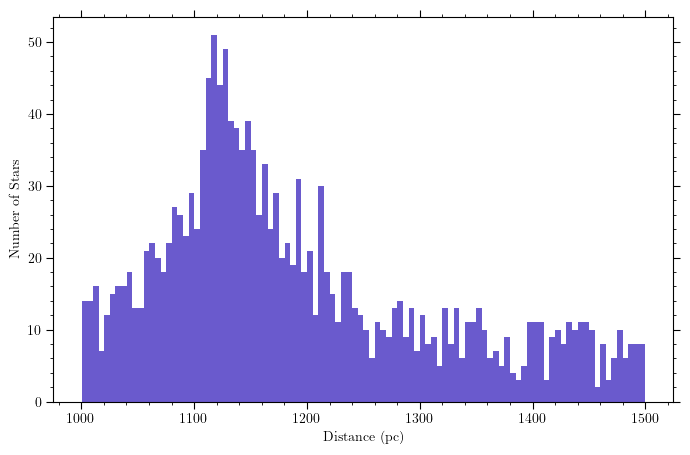

In [5]:
#CODE FOR DISTANCE CUTS
dist_m38 = dist_m38[dist_m38<1500]
dist_m38 = dist_m38[dist_m38>1000]
#CODE FOR HISTOGRAM
plt.figure(figsize=(8,5), dpi=100)
plt.hist((dist_m38), bins=100, color = 'slateblue')
plt.xlabel('Distance (pc)')
plt.ylabel('Number of Stars')
plt.show()

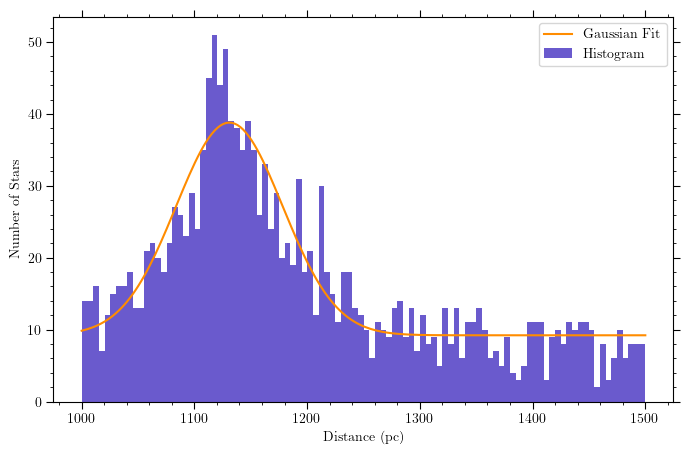

In [140]:
def f(x, A, m, s, c):
    return A*np.exp(-(x-m)**2/(2*s**2)) + c

n_m38, bins_m38 = np.histogram(dist_m38, bins=100)
bins_m38 = [0.5*(bins_m38[i]+bins_m38[i+1]) for i in range(len(bins_m38)-1)]

#CODE FOR GAUSSIAN FITTING
p0_m38 = [max(dist_m38), np.mean(dist_m38), np.std(dist_m38), 20]
popt_m38, pcov_m38 = curve_fit(f, bins_m38, n_m38, p0_m38)

x_m38 = np.linspace(1000,1500,200)
plt.figure(figsize=(8,5), dpi=100)
plt.plot(x_m38, f(x_m38, *popt_m38), color = 'darkorange')
plt.hist(dist_m38, bins=100, color = 'slateblue')
plt.xlabel('Distance (pc)')
plt.ylabel('Number of Stars')
plt.legend(['Gaussian Fit', 'Histogram'])
plt.show()

In [141]:
#cuts to be applied to parallax
print(1000/np.min([dist_m38[dist_m38>(popt_m38[1]-popt_m38[2])]]), 1000/np.max([dist_m38[dist_m38<(popt_m38[1]+popt_m38[2])]]))

0.9227220744153342 0.8488470282704348


In [160]:
query_m38_2 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pmra, pmdec, radial_velocity
FROM gaiadr3.gaia_source
where ra between 81.58 and 82.78
and dec between 35.26 and 36.46
and abs(pmra_error/pmra)<0.10
and abs(pmdec_error/pmdec)<0.10
and parallax between 0.8488 and 0.92
and pmra between 1.06 and 2.03
and pmdec between -4.84 and -4.01
order by parallax desc'''
job_m38_2 = Gaia.launch_job_async(query_m38_2)
r_m38_2 = job_m38_2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


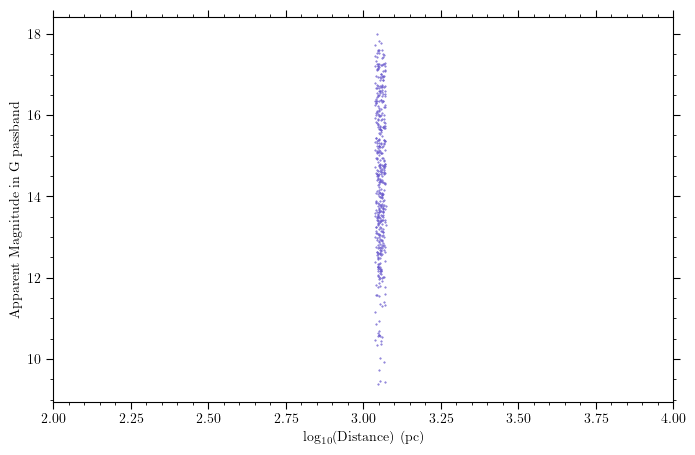

In [161]:
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(np.log10(1000/r_m38_2['parallax']),r_m38_2['phot_g_mean_mag'], s=0.2, c='slateblue')
plt.xlim(2,4)
plt.xlabel('log$_{10}$(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')
plt.show()

In [162]:
#applying sigma clipping
mean_pmra_m38, median_pmra_m38, std_pmra_m38 = sigma_clipped_stats(r_m38_2['pmra'])
mean_pmdec_m38, median_pmdec_m38, std_pmdec_m38 = sigma_clipped_stats(r_m38_2['pmdec'])
print(str(format(mean_pmra_m38-3*std_pmra_m38, '.2f'))+ ' and '+ str(format(mean_pmra_m38+3*std_pmra_m38, '.2f')))
print(str(format(mean_pmdec_m38-3*std_pmdec_m38, '.2f'))+ ' and '+ str(format(mean_pmdec_m38+3*std_pmdec_m38, '.2f')))

1.14 and 1.94
-4.83 and -4.03


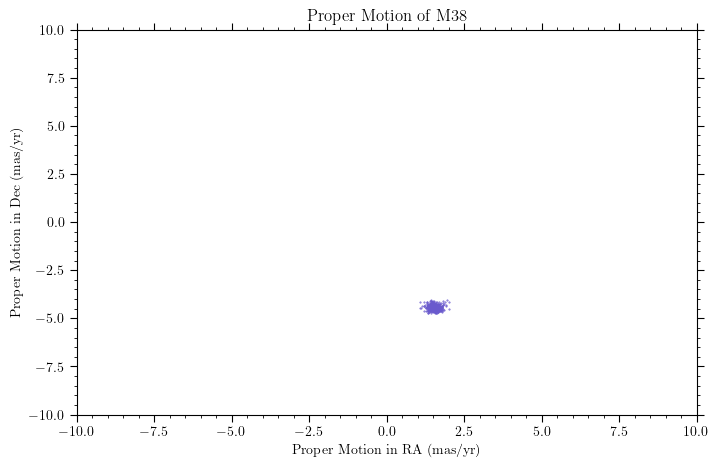

In [163]:
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(r_m38_2['pmra'],r_m38_2['pmdec'], s=0.2, c='slateblue')
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.title('Proper Motion of M38')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

# **C1**

In [165]:
query_c1 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pmra, pmdec, radial_velocity
FROM gaiadr3.gaia_source
where ra between 11.51 and 12.71
and dec between 84.66 and 85.85
and abs(pmra_error/pmra)<0.10
and abs(pmdec_error/pmdec)<0.10
and parallax_over_error > 10
order by parallax desc'''
job_c1 = Gaia.launch_job_async(query_c1)
r_c1 = job_c1.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


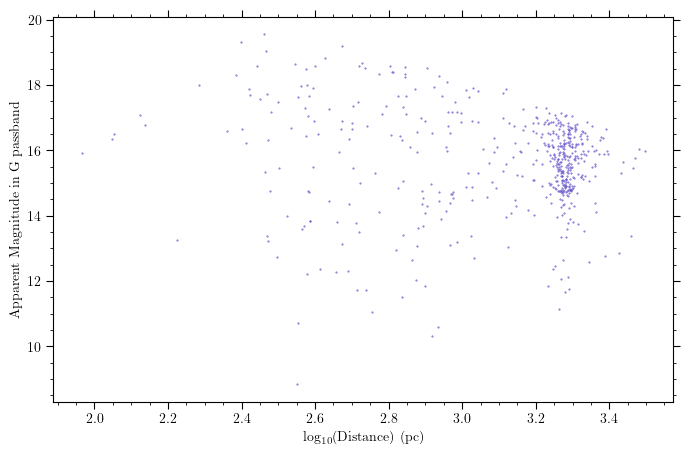

In [166]:
dist_c1 = 1000/r_c1['parallax']
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(np.log10(dist_c1),r_c1['phot_g_mean_mag'], s=0.2, c='slateblue')
plt.xlabel('log$_{10}$(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')
plt.show()

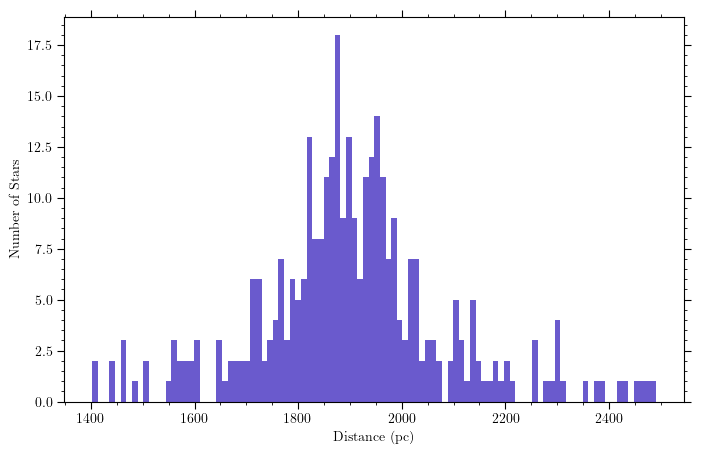

In [167]:
#CODE FOR DISTANCE CUTS
dist_c1 = dist_c1[dist_c1<2500]
dist_c1 = dist_c1[dist_c1>1400]
#CODE FOR HISTOGRAM
plt.figure(figsize=(8,5), dpi=100)
plt.hist((dist_c1), bins=100, color = 'slateblue')
plt.xlabel('Distance (pc)')
plt.ylabel('Number of Stars')
plt.show()

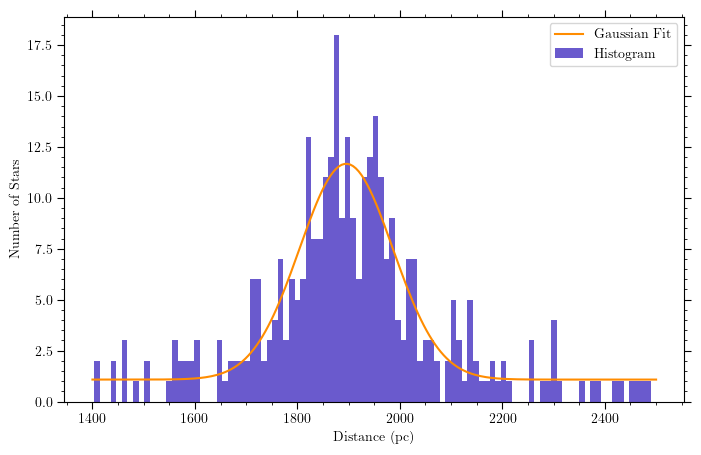

In [169]:
def f(x, A, m, s, c):
    return A*np.exp(-(x-m)**2/(2*s**2)) + c

n_c1, bins_c1 = np.histogram(dist_c1, bins=100)
bins_c1 = [0.5*(bins_c1[i]+bins_c1[i+1]) for i in range(len(bins_c1)-1)]

#CODE FOR GAUSSIAN FITTING
p0_c1 = [max(dist_c1), np.mean(dist_c1), np.std(dist_c1), 20]
popt_c1, pcov_c1 = curve_fit(f, bins_c1, n_c1, p0_c1)

x_c1 = np.linspace(1400,2500,200)
plt.figure(figsize=(8,5), dpi=100)
plt.plot(x_c1, f(x_c1, *popt_c1), color = 'darkorange')
plt.hist(dist_c1, bins=100, color = 'slateblue')
plt.xlabel('Distance (pc)')
plt.ylabel('Number of Stars')
plt.legend(['Gaussian Fit', 'Histogram'])
plt.show()


In [170]:
#cuts to be applied to parallax
print(1000/np.min([dist_c1[dist_c1>(popt_c1[1]-3*popt_c1[2])]]), 1000/np.max([dist_c1[dist_c1<(popt_c1[1]+3*popt_c1[2])]]))

0.6087469476391411 0.4624855164398745


In [13]:
query_c1_2 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pmra, pmdec, radial_velocity
FROM gaiadr3.gaia_source
where ra between 11.51 and 12.71
and dec between 84.66 and 85.85
and abs(pmra_error/pmra)<0.10
and abs(pmdec_error/pmdec)<0.10
and parallax between 0.46 and 0.6
and pmra between -2.66 and -2.0
and pmdec between -1.30 and -0.72
order by parallax desc'''
job_c1_2 = Gaia.launch_job_async(query_c1_2)
r_c1_2 = job_c1_2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


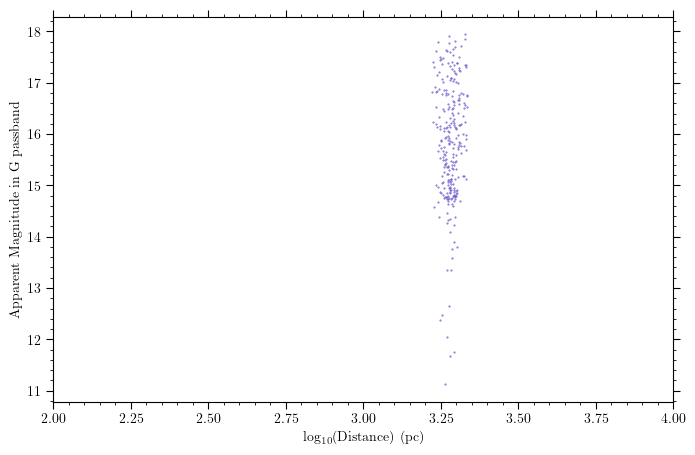

In [14]:
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(np.log10(1000/r_c1_2['parallax']),r_c1_2['phot_g_mean_mag'], s=0.2, c='slateblue')
plt.xlim(2,4)
plt.xlabel('log$_{10}$(Distance) (pc)')
plt.ylabel('Apparent Magnitude in G passband')
plt.show()

In [12]:
#applying sigma clipping
mean_pmra_c1, median_pmra_c1, std_pmra_c1 = sigma_clipped_stats(r_c1_2['pmra'])
mean_pmdec_c1, median_pmdec_c1, std_pmdec_c1 = sigma_clipped_stats(r_c1_2['pmdec'])
print(str(format(mean_pmra_c1-3*std_pmra_c1, '.2f'))+ ' and '+ str(format(mean_pmra_c1+3*std_pmra_c1, '.2f')))
print(str(format(mean_pmdec_c1-3*std_pmdec_c1, '.2f'))+ ' and '+ str(format(mean_pmdec_c1+3*std_pmdec_c1, '.2f')))

-2.66 and -2.00
-1.30 and -0.72


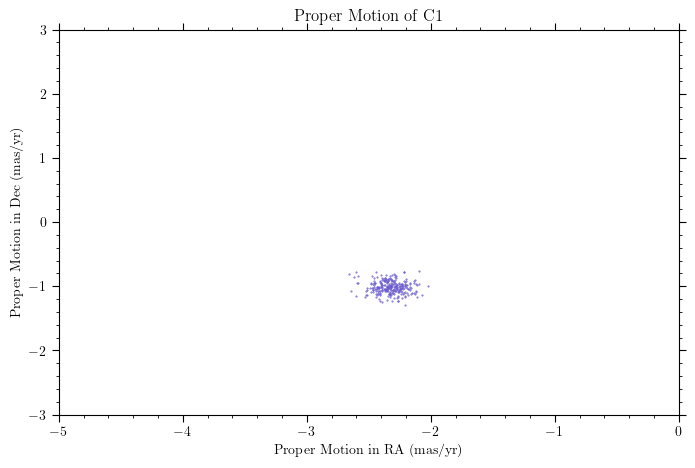

In [16]:
plt.figure(figsize=(8,5), dpi=100)
plt.scatter(r_c1_2['pmra'],r_c1_2['pmdec'], s=0.2, c='slateblue')
plt.xlabel('Proper Motion in RA (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.title('Proper Motion of C1')
plt.xlim(-5,0)
plt.ylim(-3,3)
plt.show()

# **HR Diagram**

## **M67**

In [28]:
querym67 = '''SELECT top 10000
source_id, ra, dec, parallax, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, pm, pmra, pmdec
FROM gaiadr3.gaia_source
WHERE ra between 132.3 and 133.3
AND dec between 11.3 and 12.3
AND abs(pmra_error/pmra)<0.10 
AND abs(pmdec_error/pmdec)<0.10
and parallax between 1.12 and 1.19 
order by parallax desc'''
#parallax cuts found using same method as done for M6
jobm67 = Gaia.launch_job_async(querym67)
rm67 = jobm67.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


617

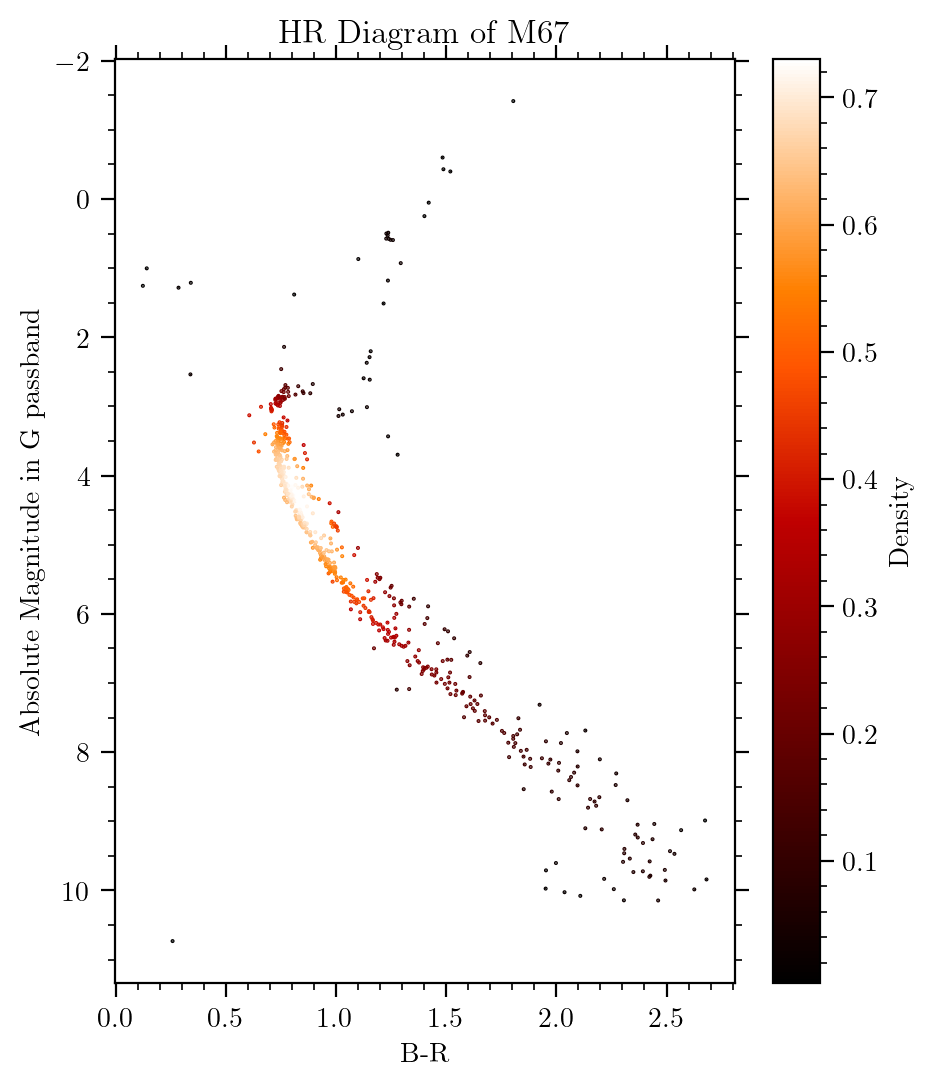

In [29]:
distm67 = 1000/rm67['parallax']
M67 = rm67['phot_g_mean_mag'] - 5*np.log10(distm67) + 5
bprp67 = rm67['phot_bp_mean_mag'] - rm67['phot_rp_mean_mag']
M67=np.array([M67[x] for x in range(len(M67)) if bprp67[x]!=np.nan])
bprp67 = np.array([x for x in bprp67 if x!=np.nan])
m6bprp67 = np.vstack((bprp67, M67))
zm67 = gaussian_kde(m6bprp67)(m6bprp67)
plt.figure(figsize=(5,6), dpi=200)
plt.title('HR Diagram of M67')
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude in G passband')
plt.scatter(bprp67, M67, s=0.2, c=zm67, cmap='gist_heat')
plt.colorbar(label='Density')
plt.gca().invert_yaxis()
plt.show()

## **M7**

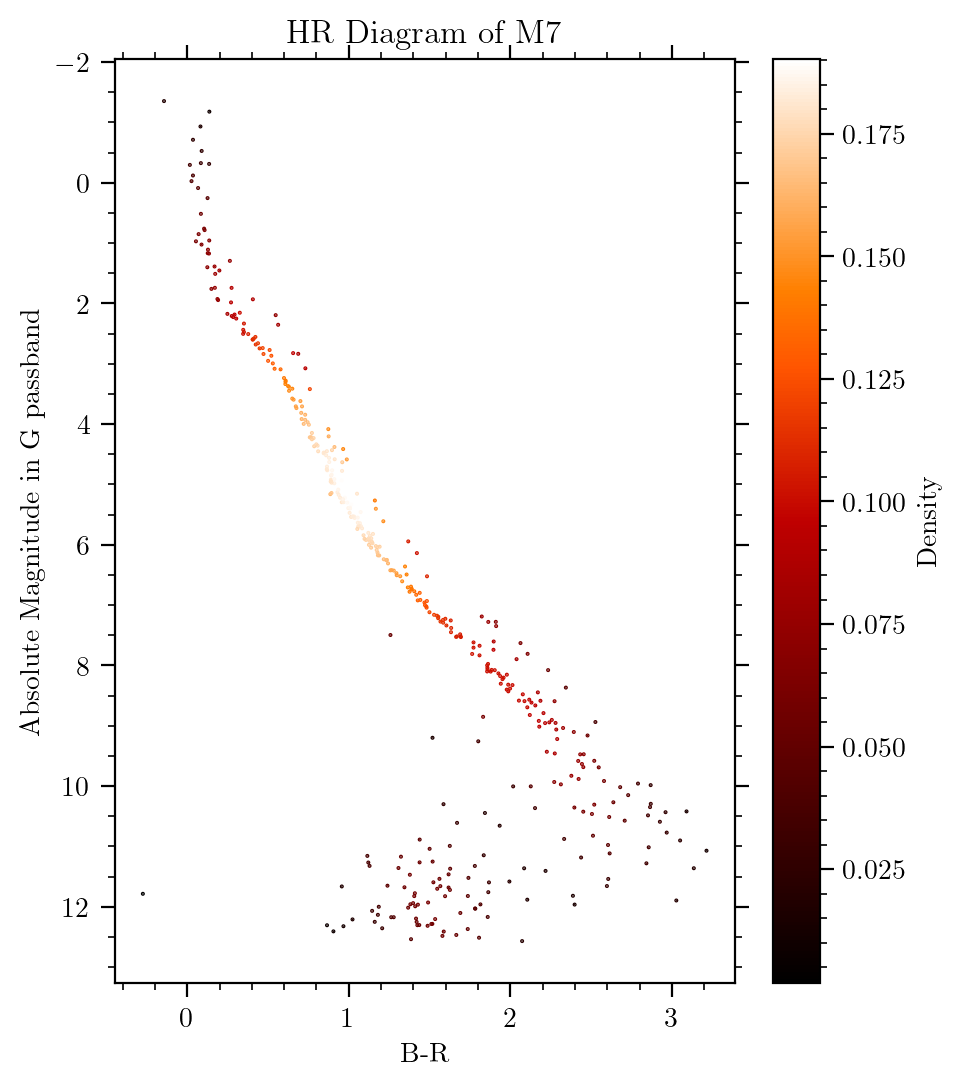

In [30]:
distm7_2 = 1000/rm7_2['parallax']
M7 = rm7_2['phot_g_mean_mag'] - 5*np.log10(distm7_2) + 5
bprp7 = rm7_2['phot_bp_mean_mag'] - rm7_2['phot_rp_mean_mag']
M7=np.array([M7[x] for x in range(len(M7)) if bprp7[x]!=np.nan])
bprp7 = np.array([x for x in bprp7 if x!=np.nan])
plt.figure(figsize=(5,6), dpi=200)
plt.title('HR Diagram of M7')
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude in G passband')
m6bprp7 = np.vstack((bprp7, M7))
zm7 = gaussian_kde(m6bprp7)(m6bprp7)
plt.scatter(bprp7, M7, s=0.2, c=zm7, cmap='gist_heat')
plt.colorbar(label='Density')
plt.gca().invert_yaxis()
plt.show()

## **M6**

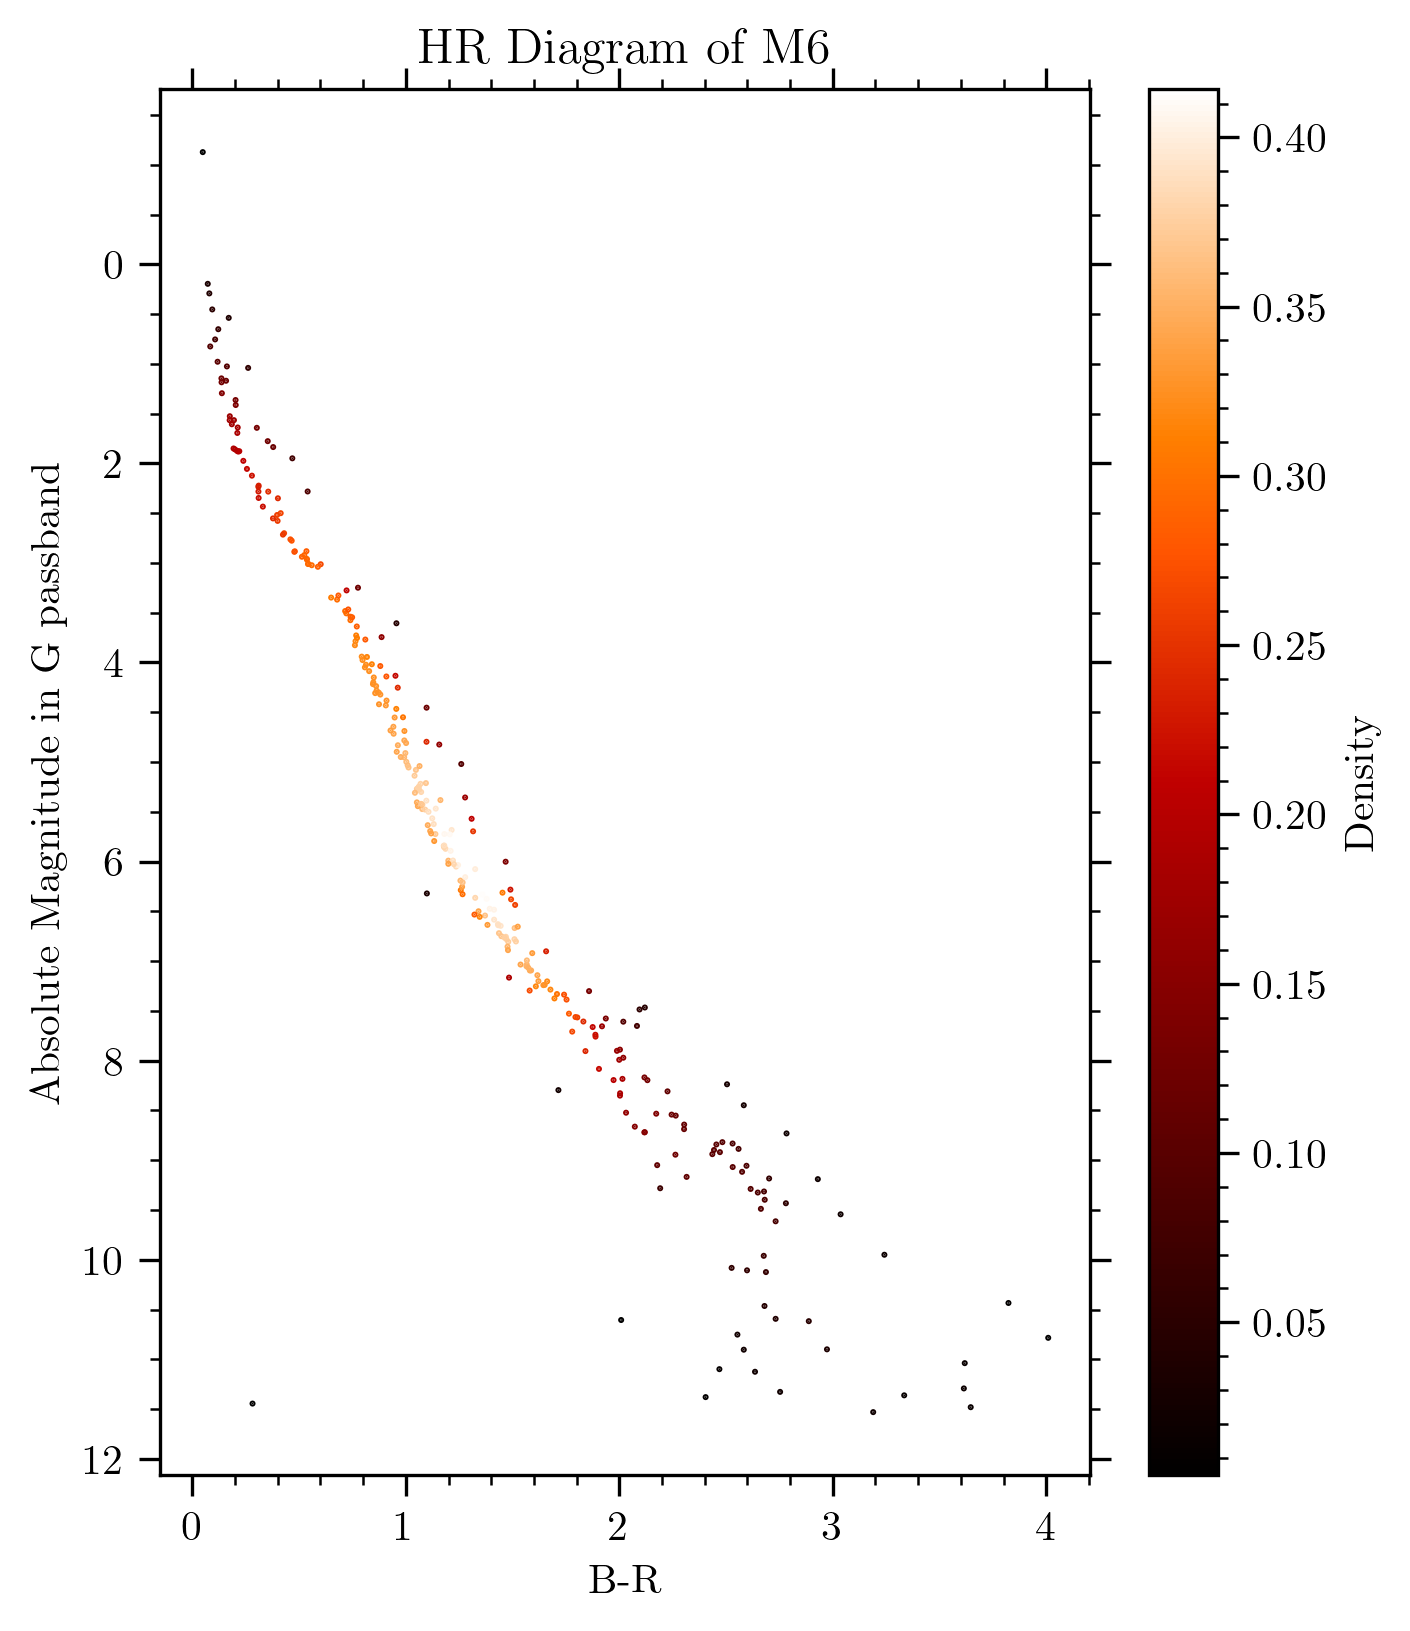

In [31]:
distm6_2 = 1000/rm6_2['parallax']
M6 = rm6_2['phot_g_mean_mag'] - 5*np.log10(distm6_2) + 5
bprp6 = rm6_2['phot_bp_mean_mag'] - rm6_2['phot_rp_mean_mag']
M6=np.array([M6[x] for x in range(len(M6)) if bprp6[x]!=np.nan])
bprp6 = np.array([x for x in bprp6 if x!=np.nan])
m6bprp6 = np.vstack((bprp6, M6))
zm6 = gaussian_kde(m6bprp6)(m6bprp6)
plt.figure(figsize=(5,6), dpi=300)
plt.title('HR Diagram of M6')
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude in G passband')
plt.scatter(bprp6, M6, s=0.2, c=zm6, cmap='gist_heat')
plt.colorbar(label='Density')
plt.gca().invert_yaxis()
plt.show()

## **M50**

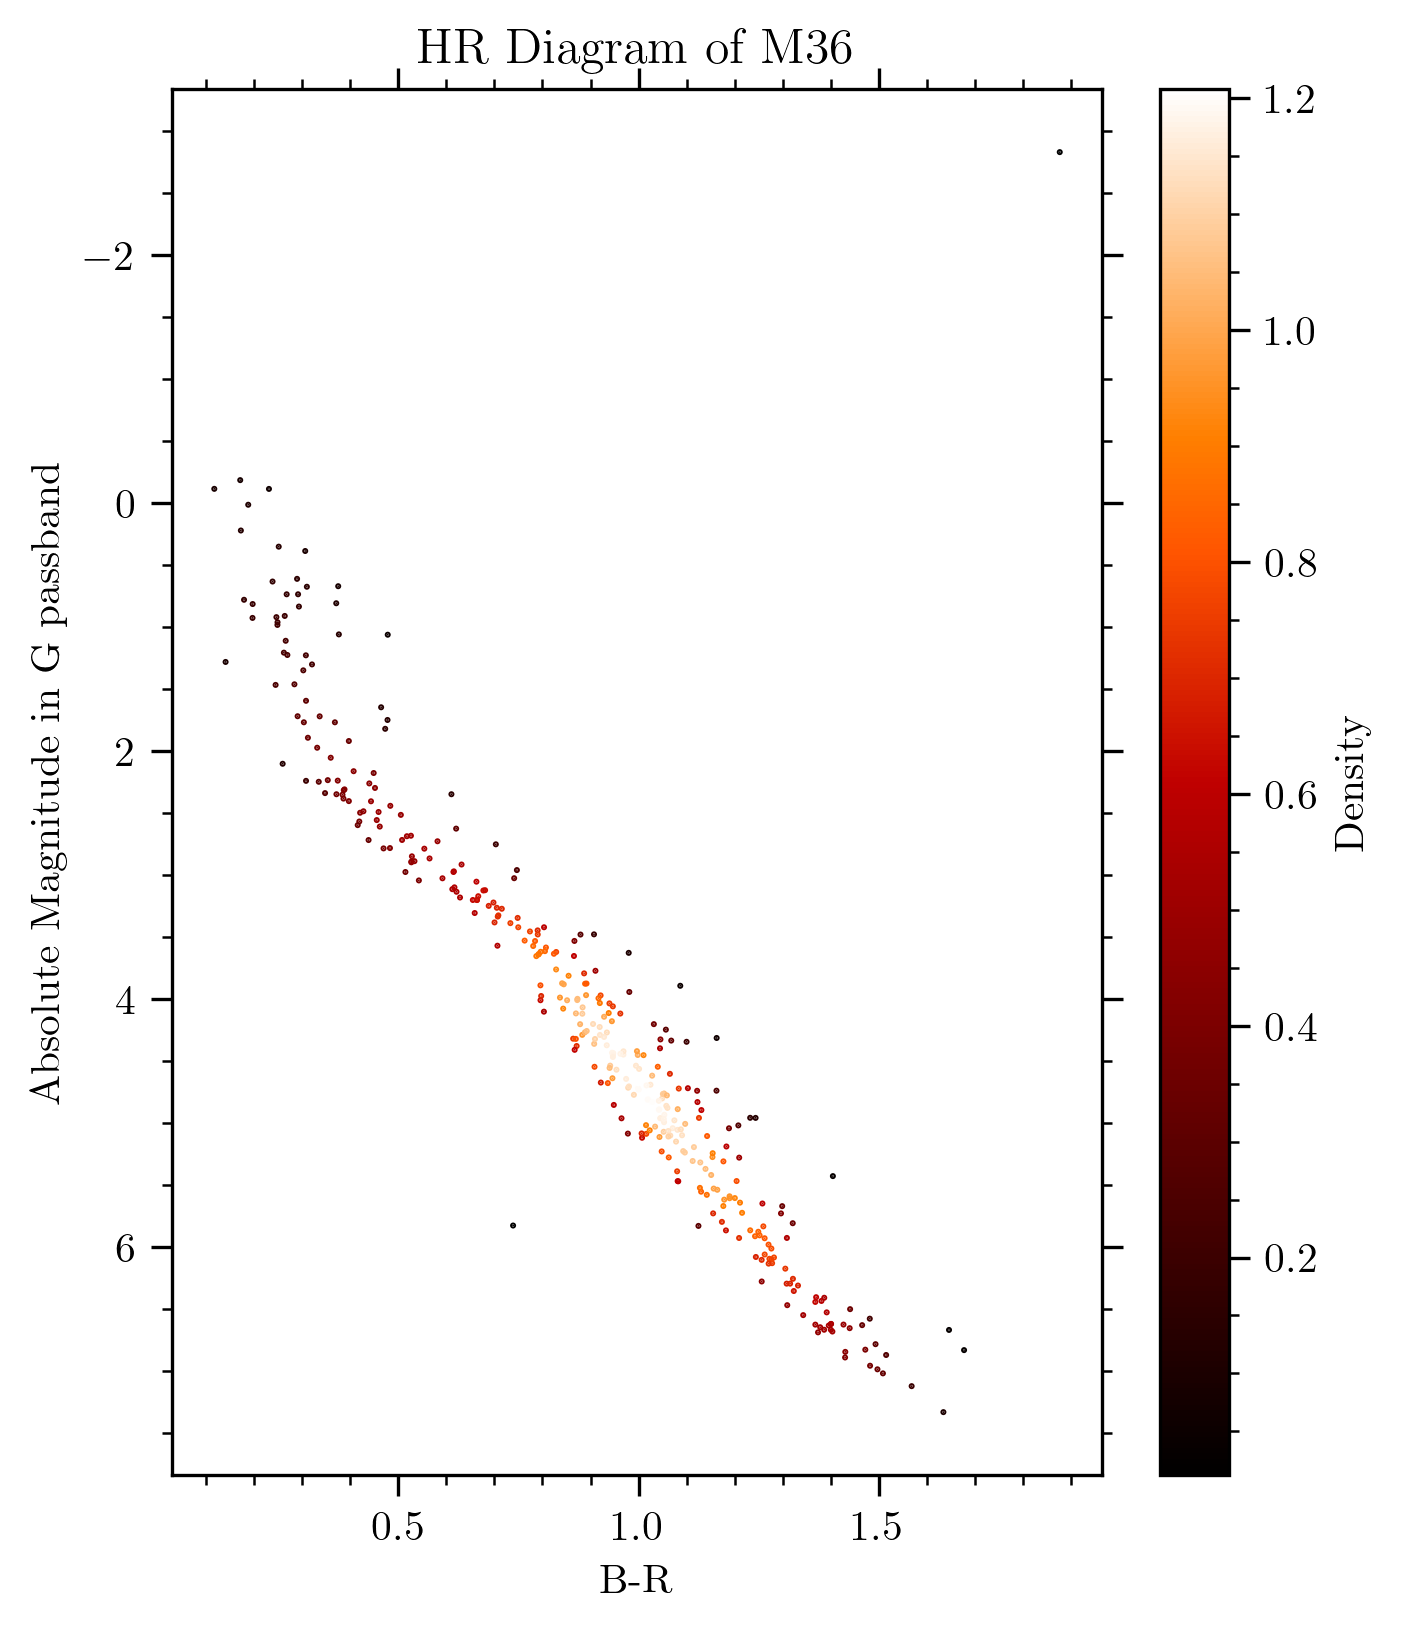

In [95]:
distm50_2 = 1000/rm50_2['parallax']
M50 = rm50_2['phot_g_mean_mag'] - 5*np.log10(distm38_2) + 5
bprp50 = rm50_2['phot_bp_mean_mag'] - rm50_2['phot_rp_mean_mag']
M50=np.array([M50[x] for x in range(len(M50)) if bprp50[x]!=np.nan])
bprp50 = np.array([x for x in bprp50 if x!=np.nan])
m6bprp50 = np.vstack((bprp50, M50))
zm38 = gaussian_kde(m6bprp50)(m6bprp50)
plt.figure(figsize=(5,6), dpi=300)
plt.title('HR Diagram of M50')
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude in G passband')
plt.scatter(bprp38, M38, s=0.2, c=zm38, cmap='gist_heat')
plt.colorbar(label='Density')
plt.gca().invert_yaxis()
plt.show()

## **M45**

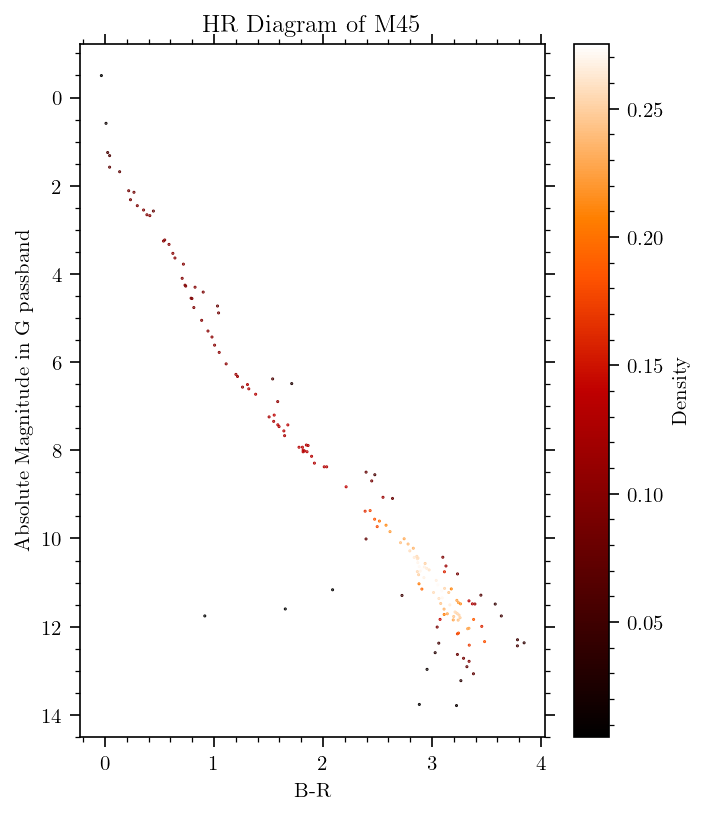

In [99]:
dist_m45_2 = 1000/r_m45_2['parallax']
M45 = r_m45_2['phot_g_mean_mag'] - 5*np.log10(dist_m45_2) + 5
bprp45 = r_m45_2['phot_bp_mean_mag'] - r_m45_2['phot_rp_mean_mag']
M45=np.array([M45[x] for x in range(len(M45)) if bprp45[x]!=np.nan])
bprp45 = np.array([x for x in bprp45 if x!=np.nan])
m6bprp45 = np.vstack((bprp45, M45))
zm45 = gaussian_kde(m6bprp45)(m6bprp45)
plt.figure(figsize=(5,6), dpi=150)
plt.title('HR Diagram of M45')
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude in G passband')
plt.scatter(bprp45, M45, s=0.2, c=zm45, cmap='gist_heat')
plt.colorbar(label='Density')
plt.gca().invert_yaxis()
plt.show()

## **Lambda Orionis**

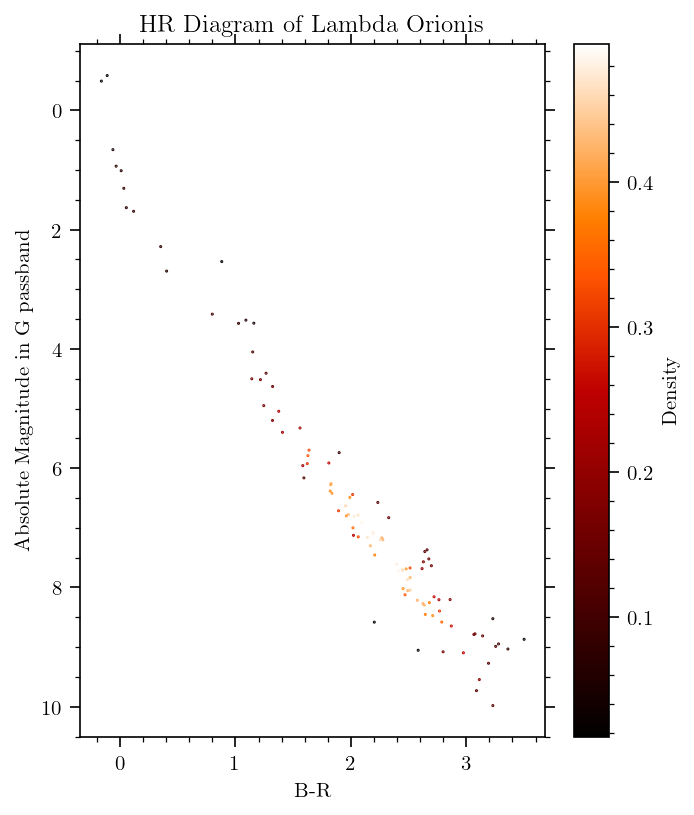

In [124]:
dist_loc_2 = 1000/r_loc_2['parallax']
M_loc = r_loc_2['phot_g_mean_mag'] - 5*np.log10(dist_loc_2) + 5
bprp_loc = r_loc_2['phot_bp_mean_mag'] - r_loc_2['phot_rp_mean_mag']
M_loc=np.array([M_loc[x] for x in range(len(M_loc)) if bprp_loc[x]!=np.nan])
bprp_loc = np.array([x for x in bprp_loc if x!=np.nan])
m6bprp_loc = np.vstack((bprp_loc, M_loc))
zm_loc = gaussian_kde(m6bprp_loc)(m6bprp_loc)
plt.figure(figsize=(5,6), dpi=150)
plt.title('HR Diagram of Lambda Orionis') 
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude in G passband')
plt.scatter(bprp_loc, M_loc, s=0.2, c=zm_loc, cmap='gist_heat')
plt.colorbar(label='Density')
plt.gca().invert_yaxis()
plt.show()

## **M38**

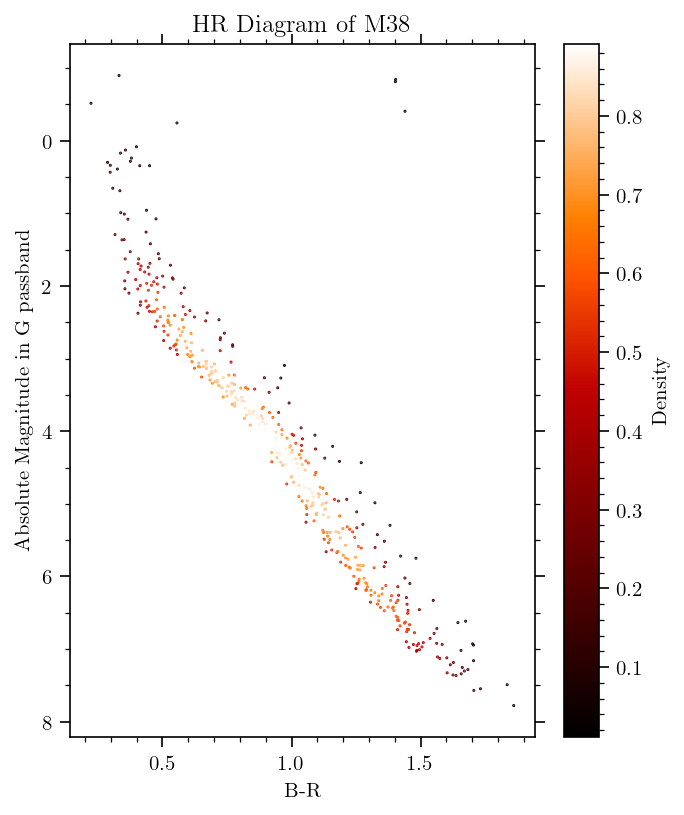

In [164]:
dist_m38_2 = 1000/r_m38_2['parallax']
M38 = r_m38_2['phot_g_mean_mag'] - 5*np.log10(dist_m38_2) + 5
bprp38 = r_m38_2['phot_bp_mean_mag'] - r_m38_2['phot_rp_mean_mag']
M38=np.array([M38[x] for x in range(len(M38)) if bprp38[x]!=np.nan])
bprp38 = np.array([x for x in bprp38 if x!=np.nan])
m6bprp38 = np.vstack((bprp38, M38))
zm38 = gaussian_kde(m6bprp38)(m6bprp38)
plt.figure(figsize=(5,6), dpi=150)
plt.title('HR Diagram of M38')
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude in G passband')
plt.scatter(bprp38, M38, s=0.2, c=zm38, cmap='gist_heat')
plt.colorbar(label='Density')
plt.gca().invert_yaxis()
plt.show()

## **C1**

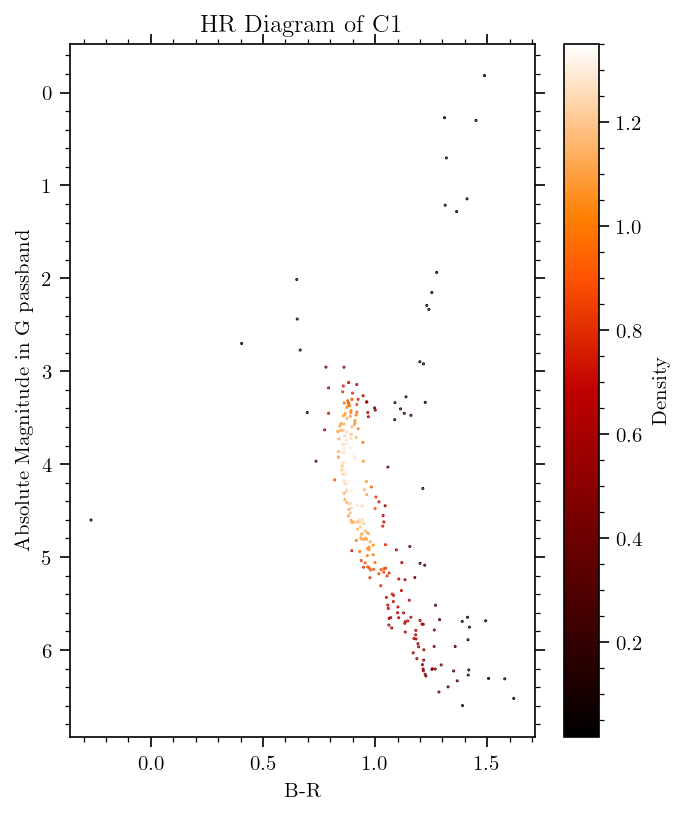

In [17]:
dist_c1_2 = 1000/r_c1_2['parallax']
M_c1 = r_c1_2['phot_g_mean_mag'] - 5*np.log10(dist_c1_2) + 5
bprp_c1 = r_c1_2['phot_bp_mean_mag'] - r_c1_2['phot_rp_mean_mag']
M_c1=np.array([M_c1[x] for x in range(len(M_c1)) if bprp_c1[x]!=np.nan])
bprp_c1 = np.array([x for x in bprp_c1 if x!=np.nan])
m6bprp_c1 = np.vstack((bprp_c1, M_c1))
zm_c1 = gaussian_kde(m6bprp_c1)(m6bprp_c1)
plt.figure(figsize=(5,6), dpi=150)
plt.title('HR Diagram of C1')
plt.xlabel('B-R')
plt.ylabel('Absolute Magnitude in G passband')
plt.scatter(bprp_c1, M_c1, s=0.2, c=zm_c1, cmap='gist_heat')
plt.colorbar(label='Density')
plt.gca().invert_yaxis()
plt.show()